# Supervised Learning: Classification

Broadly speaking, we can identify three main operational areas in ML:

- Supervised Learning;
- Unsupervised Learning;
- Reinforcement Learning.

## Machine Learning areas

![alt text](../resources/machine-learning.png "Title")


We are talking about supervised learning when we have a set of targets and we want our model to learn to recognize patterns and associate data points to a specific target.

Targets can be either:
- numeric (regression);
- categorical (classification).

Today we'll focus on the latter.

## Introduction to classification

We have a dataset and a set of targets (labels) for each data point.

In general terms, when performing classification, we are trying to represent all items in a multidimensional space and to find a boundary between different groups.  
We can achieve this in two ways:

#### Transforming the data so that the classes are lineraly separable

<figure style="text-align:center">
  <img src="https://i2.wp.com/appliedmachinelearning.blog/wp-content/uploads/2017/03/svm_logo1.png?fit=392%2C374&ssl=1" alt="" style="width:40%;text-align:center">
  <figcaption style="text-align:center">Linear (planar) separation in space</figcaption>
</figure>



#### Using non-linear algorithms


<figure style="text-align:center">
  <img src="https://cdn-images-1.medium.com/max/1600/1*5l08QfsUsrsOxcPzfDoStg.png" alt="" style="width:70%;text-align:center">
  <figcaption style="text-align:center">Linear vs nonlinear model</figcaption>
</figure>

In [83]:
# numpy for algebra
import numpy as np
# pandas for data manipulation
import pandas as pd
# sklearn for machine learning
from sklearn import datasets

# matplotlib an d seaborn for plotting and graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
plt.rcParams["figure.figsize"] = 16, 3

## Binary classification

We will use some datasets bundled with scikit learn. For binary classification we will use the breast cancer detection set.

Some details below:



Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.  
https://goo.gl/U2Uwz2 
  
Features are computed from a digitized image of a fine needle  
aspirate (FNA) of a breast mass.  They describe  
characteristics of the cell nuclei present in the image.  

In [85]:
bc_dataset = datasets.load_breast_cancer()

In [86]:
df = pd.DataFrame(bc_dataset["data"], columns=bc_dataset["feature_names"])

In [87]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
target = pd.Series(bc_dataset["target"])

In [89]:
target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [90]:
# class balance
target.value_counts()

1    357
0    212
dtype: int64

In [91]:
bc_dataset["target_names"]

array(['malignant', 'benign'], dtype='<U9')

### The algorithm

For this example we will use one of the simplest algorithms available for binary classification: Logistic Regression.

We are trying to get a combination of the features (x axis) such that a logistic curve can differentiate the two classes (y axis).


<figure style="text-align:center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg" alt="" style="width:50%;text-align:center">
  <figcaption style="text-align:center"> Example of logistic regression - probability of passing an exam vs hours of studying</figcaption>
</figure>


As simplistic as this may sound, it actually works well in a lot of real world situations.

### Data exploration and preparation

In any scenario when we are trying to fit data to a label, we must ensure that our model retains predictive power (avoid overfitting!).

To do so we need to split the data so that we can run the evaluation on data points the model has not seen before (testing generalization).

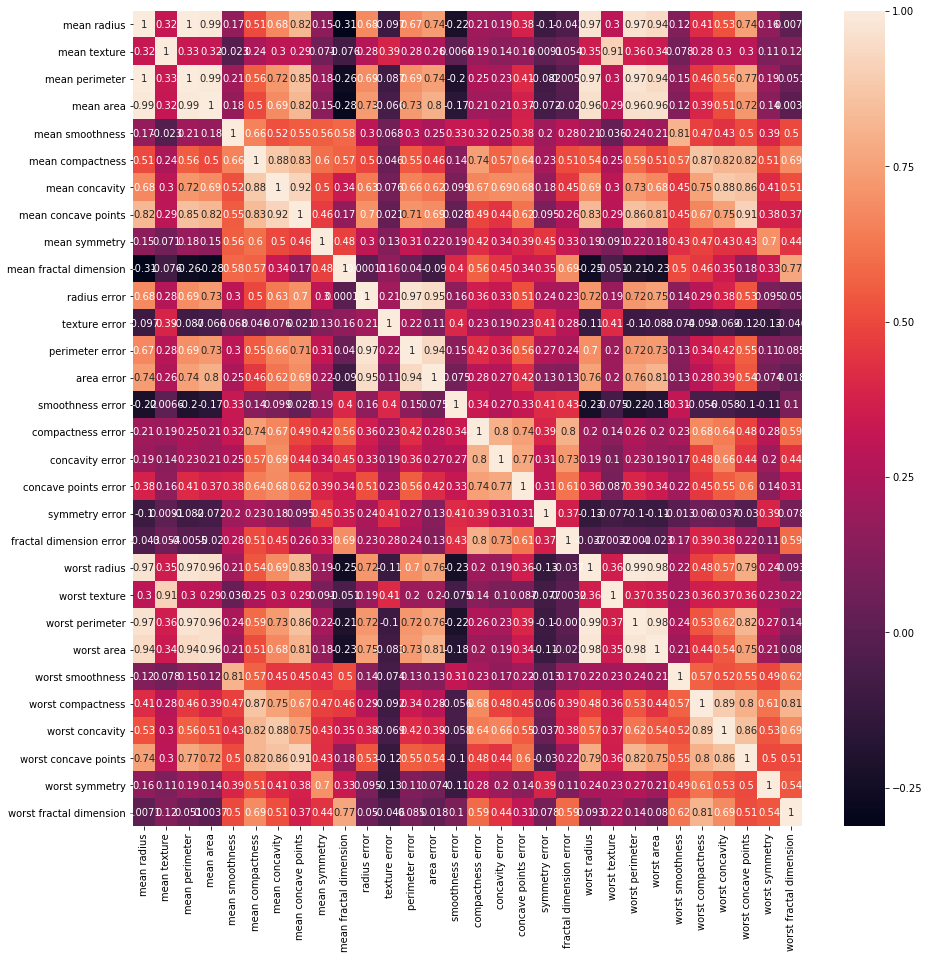

In [93]:
# correlations
plt.rcParams["figure.figsize"] = 15, 15
sns.heatmap(df.corr(), annot=True)

In [94]:
import tqdm
from sklearn.preprocessing import StandardScaler

scalers = {}

for column in tqdm.tqdm(df.columns):
    _scaler = StandardScaler()
    _scaler.fit(df[column].values.reshape(-1, 1))
    scalers[column] = _scaler

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 2507.06it/s]


In [95]:
# transform the columns
import copy

data = copy.deepcopy(df)

for column in tqdm.tqdm(df.columns):
    data[column] = scalers[column].transform(df[column].values.reshape(-1, 1))

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 3749.04it/s]


In [96]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [97]:
# random split of data
from sklearn import model_selection

train, test, target_train, target_test = model_selection.train_test_split(data, target)

In [98]:
train.shape, test.shape

((426, 30), (143, 30))

### Training and evaluation

In [99]:
# instantiate the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [100]:
lr.fit(train, target_train)

c:\users\pietr\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We can check the training score to see if the model is learning something from the data...

In [101]:
lr.score(train, target_train)

0.9859154929577465

It looks like the training score is very high (always between 0 and 1). The model is learning a lot about the data.

But is it learning patterns or is it just memorizing this specific dataset?

### Evaluation

We use the test set to run evaluation and verify how well the model is behaving.

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
predictions = lr.predict(test)

In [104]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**What do these numbers mean?**

<figure style="text-align:center">
  <img src="https://www.digital-mr.com/media/cache/5e/b4/5eb4dbc50024c306e5f707736fd79c1e.png" alt="" style="width:90%;text-align:center">
  <figcaption style="text-align:center"> Precision and recall</figcaption>
</figure>

The confusion matrix shows in detail what errors we are committing.

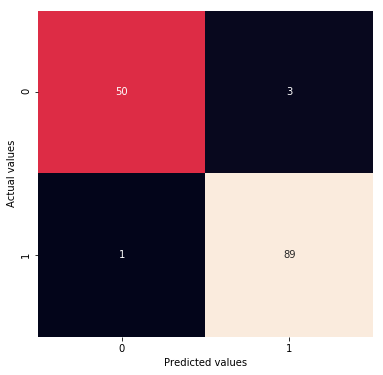

In [105]:
plt.rcParams["figure.figsize"] = 6, 6
sns.heatmap(confusion_matrix(target_test, predictions), annot=True, cbar=False)
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

## Multiclass classification

As the name suggests we are dealing with multiple classes. Some methods need to change in order to cope with the new problem configuration.


<figure style="text-align:center">
  <img src="https://i.stack.imgur.com/La40O.jpg" alt="" style="width:60%;text-align:center">
  <figcaption style="text-align:center">Multiclass classification</figcaption>
</figure>



Also, some algorithms don't work anymore (such as Logistic regression*).

We will use the wine dataset!

In [106]:
wine = datasets.load_wine()

In [107]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])

In [108]:
target = pd.Series(wine["target"])

### Data exploration, preparation, and fitting.

In [109]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [110]:
target.value_counts()

1    71
0    59
2    48
dtype: int64

In [111]:
scalers = {}

for column in tqdm.tqdm(df.columns):
    _scaler = StandardScaler()
    _scaler.fit(df[column].values.reshape(-1, 1))
    scalers[column] = _scaler

100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1632.02it/s]


In [112]:
# transform the columns
import copy

data = copy.deepcopy(df)

for column in tqdm.tqdm(df.columns):
    data[column] = scalers[column].transform(df[column].values.reshape(-1, 1))

100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 4348.86it/s]


In [113]:
data.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


### How to deal with multiclass targets

There are a few problems with categorical multiclass targets...

In [114]:
_targets = pd.get_dummies(target)

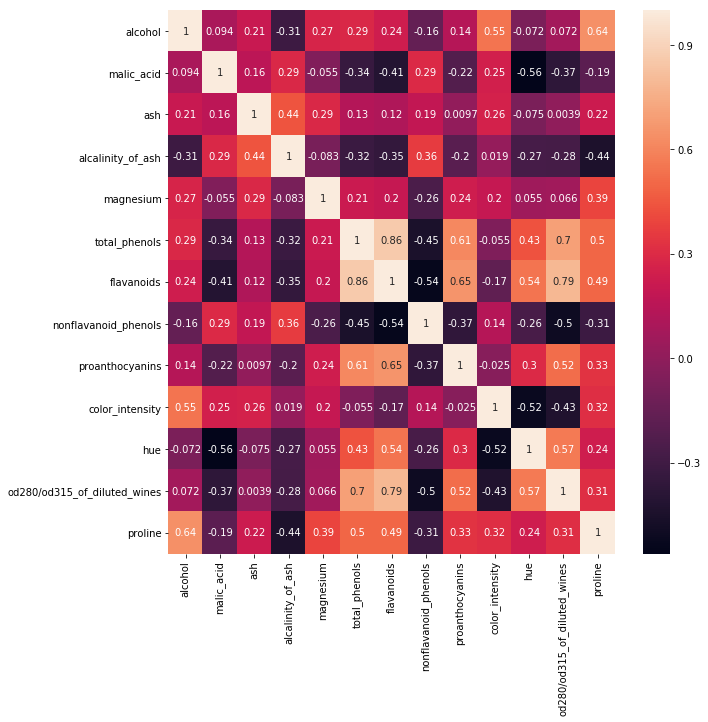

In [115]:
plt.rcParams["figure.figsize"] = 10, 10
sns.heatmap(df.corr(), annot=True)

In [213]:
# random split of data
from sklearn import model_selection

train, test, target_train, target_test = model_selection.train_test_split(data, _targets, random_state=48)

In [214]:
train.shape, test.shape

((133, 13), (45, 13))

## The algorithm

In [215]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [216]:
dtc.fit(train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [217]:
dtc.score(train, target_train)

1.0

## Evaluation

In [220]:
predictions = dtc.predict(test)

In [221]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.88      0.74      0.80        19
           2       0.94      0.88      0.91        17

   micro avg       0.84      0.84      0.84        45
   macro avg       0.83      0.87      0.84        45
weighted avg       0.86      0.84      0.84        45
 samples avg       0.84      0.84      0.84        45



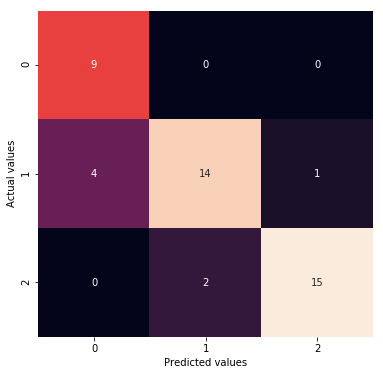

In [225]:
plt.rcParams["figure.figsize"] = 6, 6
sns.heatmap(confusion_matrix([np.argmax(i) for i in target_test.values], [np.argmax(i) for i in predictions]), annot=True, cbar=False)
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

In [227]:
for i in zip(dtc.feature_importances_, df.columns):
    print(i)

(0.03716244359597362, 'alcohol')
(0.0, 'malic_acid')
(0.0, 'ash')
(0.011541131551544603, 'alcalinity_of_ash')
(0.0, 'magnesium')
(0.0, 'total_phenols')
(0.3648130216422476, 'flavanoids')
(0.017311697327316904, 'nonflavanoid_phenols')
(0.0, 'proanthocyanins')
(0.02261119650914862, 'color_intensity')
(0.061256775158198294, 'hue')
(0.06019735846705648, 'od280/od315_of_diluted_wines')
(0.42510637574851384, 'proline')


### Overfitting

Let's quickly try a different algorithm

In [228]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
knn = KNeighborsClassifier()

In [230]:
knn.fit(train, target_train)

knn.score(train, target_train)

0.9849624060150376

In [232]:
predictions = knn.predict(test)

In [233]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        17

   micro avg       0.96      0.96      0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45



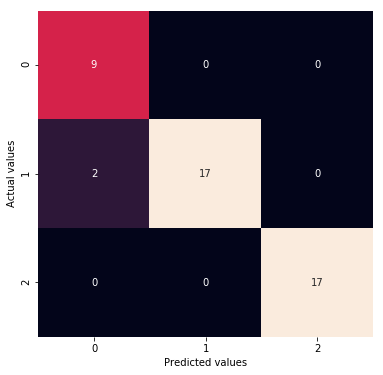

In [234]:
plt.rcParams["figure.figsize"] = 6, 6
sns.heatmap(confusion_matrix([np.argmax(i) for i in target_test.values], [np.argmax(i) for i in predictions]), annot=True, cbar=False)
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.show()

In [ ]:
https://www.theaimonk.com/post/machine-learning-algorithms